In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yahoo_fin

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nsepython

Note: you may need to restart the kernel to use updated packages.


In [4]:
from nsepython import *

In [5]:
import pandas as pd

In [6]:
from datetime import date

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
import yfinance as yf

In [10]:
def getData(ticker):
    symbol = ticker
    series = "EQ"
    start_date = "01-01-2023"
    end_date ="08-04-2023"
    df = equity_history(symbol,series,start_date,end_date)
    df = pd.DataFrame(df)
    df = df.sort_values(by='CH_TIMESTAMP', ascending = True)
    df.rename(columns = {'_id':'id',
                     'CH_SYMBOL' : 'SYM', 
                     'CH_SERIES':'Type', 
                     'CH_MARKET_TYPE': 'MType', 
                     'CH_TRADE_HIGH_PRICE':'High', 
                     'CH_TRADE_LOW_PRICE':'Low', 
                     'CH_OPENING_PRICE':'Open', 
                     'CH_CLOSING_PRICE':'Close', 
                     'CH_LAST_TRADED_PRICE':'Last_Price', 
                     'CH_PREVIOUS_CLS_PRICE':'Prev_Close',
                     'CH_TOT_TRADED_QTY': 'Trade_Qty',
                     'CH_TOT_TRADED_VAL': 'Trade_Value',
                     'CH_52WEEK_HIGH_PRICE':'52High',
                     'CH_52WEEK_LOW_PRICE':'52Low',
                     'CH_TOTAL_TRADES':'TotalTrades',
                     'CH_ISIN':'ISIN',
                     'CH_TIMESTAMP': 'Date',
                     'TIMESTAMP':'TS',
                     'createdAt':'CTS',
                     'updatedAt':'UTS',
                     '__v':'v',
                     'SLBMH_TOT_VAL': 'val',
                     'VWAP':'VWAP',
                     'mTIMESTAMP':'Date2'
                        }, inplace = True)
    df = df.drop(['id', 'Type', 'MType', 'Last_Price', 'Prev_Close', '52High', '52Low', 'ISIN', 'TS', 'CTS', 'UTS', 'v', 'val', 'Date2'], axis = 1)
    
    stock = yf.Ticker(ticker + ".NS")
    print(ticker + ".NS")
    data = stock.history(start="2023-01-01",  end="2023-04-08")
    df = df.set_index('Open').join(data.set_index('Open'), lsuffix='_left', rsuffix='_right')
    df = df.drop(['High_right', 'Low_right', 'Close_right'], axis = 1)
    df = df.rename(columns = {'High_left':'High', 'Low_left': 'Low', 'Close_left': 'Close', 'Stock Splits': 'StockSplit'})
    df = df.reset_index()
    first_column = df.pop('Date')
    df.insert(0, 'Date', first_column)
    print(max(df['Volume']))
    df['Volume'] =  df['Volume'].fillna((df['Volume'].mean()))
    df['Dividends'] =  df['Dividends'].fillna((df['Dividends'].mean()))
    df['StockSplit'] =  df['StockSplit'].fillna((df['StockSplit'].mean()))
    
    print(df.shape)
    
    return df

In [11]:
t1 = input("Enter the Ticker of First Stock: ")
t2 = input("Enter the Ticker of Second Stock: ")

Enter the Ticker of First Stock: INFY
Enter the Ticker of Second Stock: SBIN


In [12]:
stock1 = getData(t1)
stock2 = getData(t2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nsepython/rahu.py:544: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total=total.append(equity_history_virgin(symbol,series,start_date,temp_date))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nsepython/rahu.py:544: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total=total.append(equity_history_virgin(symbol,series,start_date,temp_date))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nsepython/rahu.py:561: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total=total.append(equity_history_virgin(symbol,series,start_date,end_date))


INFY.NS
11610426.0
(71, 13)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nsepython/rahu.py:544: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total=total.append(equity_history_virgin(symbol,series,start_date,temp_date))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nsepython/rahu.py:544: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total=total.append(equity_history_virgin(symbol,series,start_date,temp_date))


SBIN.NS
40797825.0
(71, 13)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nsepython/rahu.py:561: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total=total.append(equity_history_virgin(symbol,series,start_date,end_date))


In [13]:
combined = pd.concat([stock1, stock2])
combined.head()

,Date,Open,SYM,High,Low,Close,Trade_Qty,Trade_Value,TotalTrades,VWAP,Volume,Dividends,StockSplit
0,2023-03-29,1379.00,INFY,1389.90,1364.55,1383.55,8813966,1.213957e+10,235693,1377.31,8.813966e+06,0.0,0.0
1,2023-03-23,1383.95,INFY,1383.95,1370.00,1374.55,7607718,1.046984e+10,339878,1376.21,5.973612e+06,0.0,0.0
2,2023-03-27,1386.25,INFY,1395.75,1374.10,1388.95,4170193,5.791748e+09,214904,1388.84,4.170193e+06,0.0,0.0
3,2023-03-24,1388.00,INFY,1398.95,1377.50,1380.65,7559127,1.049940e+10,204870,1388.97,7.559127e+06,0.0,0.0
4,2023-03-28,1392.10,INFY,1398.00,1375.85,1377.60,6633366,9.173851e+09,154855,1382.99,5.973612e+06,0.0,0.0


In [14]:
fit1 = ols('Trade_Qty ~ SYM', data = combined).fit()
anova = sm.stats.anova_lm(fit1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
SYM,1.0,3.548583e+15,3.548583e+15,83.046296,7.567214e-16
Residual,140.0,5.982226e+15,4.273018e+13,NaN,NaN


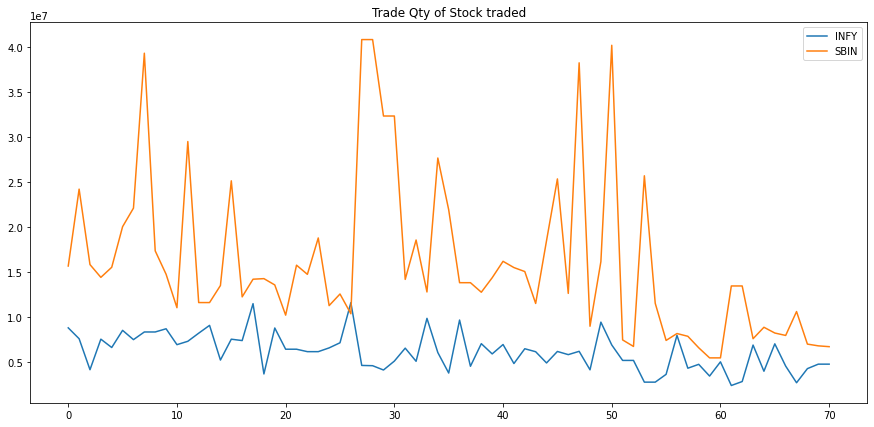

In [15]:
stock1['Trade_Qty'].plot(label = t1, figsize = (15,7))
stock2['Trade_Qty'].plot(label = t2)
plt.title('Trade Qty of Stock traded')
plt.legend()

In [16]:
fit2 = ols('Trade_Value ~ SYM', data = combined).fit()
anova = sm.stats.anova_lm(fit2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
SYM,1.0,5.577730e+18,5.577730e+18,0.360678,0.549101
Residual,140.0,2.165043e+21,1.546459e+19,NaN,NaN


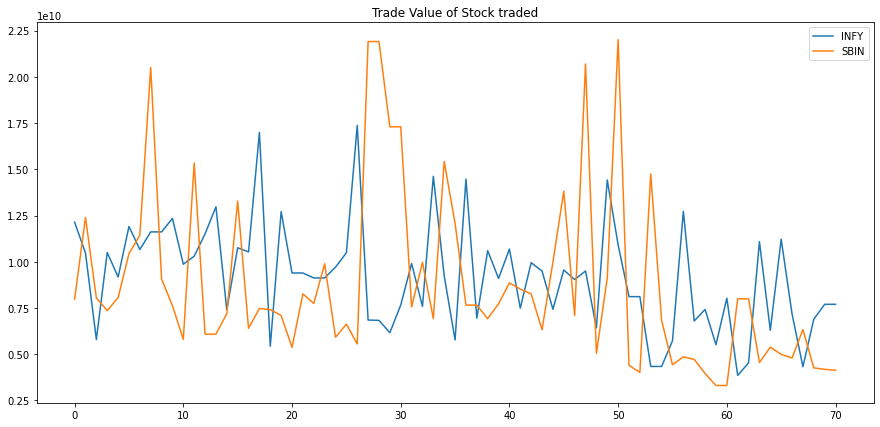

In [17]:
stock1['Trade_Value'].plot(label = t1, figsize = (15,7))
stock2['Trade_Value'].plot(label = t2)
plt.title('Trade Value of Stock traded')
plt.legend()

In [18]:
fit3 = ols('TotalTrades ~ SYM', data = combined).fit()
anova = sm.stats.anova_lm(fit3)
anova

,df,sum_sq,mean_sq,F,PR(>F)
SYM,1.0,3.121445e+10,3.121445e+10,3.540264,0.061972
Residual,140.0,1.234378e+12,8.816985e+09,NaN,NaN


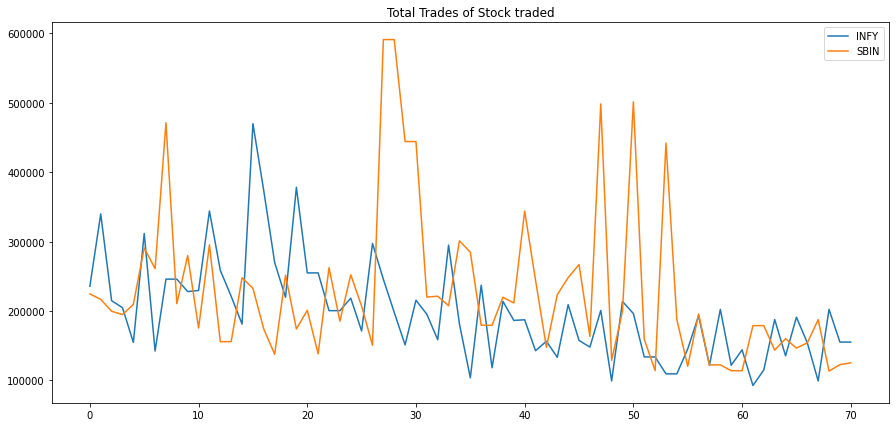

In [19]:
stock1['TotalTrades'].plot(label = t1, figsize = (15,7))
stock2['TotalTrades'].plot(label = t2)
plt.title('Total Trades of Stock traded')
plt.legend()

In [20]:
fit4 = ols('Volume ~ SYM', data = combined).fit()
anova = sm.stats.anova_lm(fit4)
anova

,df,sum_sq,mean_sq,F,PR(>F)
SYM,1.0,4.430795e+15,4.430795e+15,165.135763,1.876356e-25
Residual,140.0,3.756372e+15,2.683123e+13,NaN,NaN


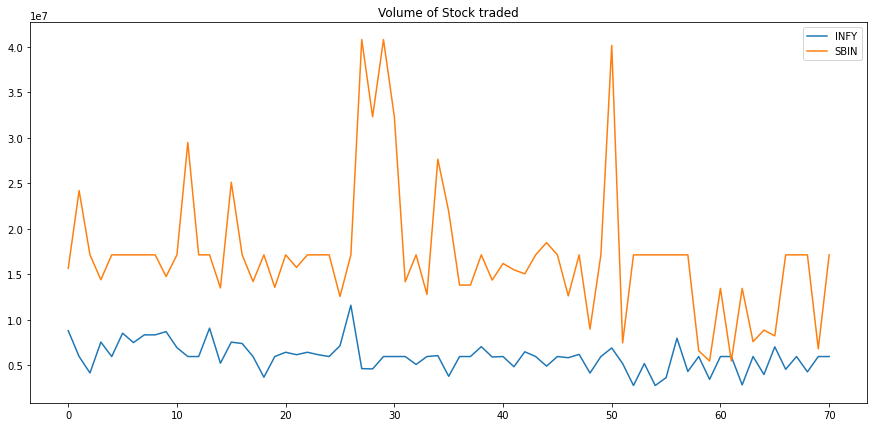

In [21]:
stock1['Volume'].plot(label = t1, figsize = (15,7))
stock2['Volume'].plot(label = t2)
plt.title('Volume of Stock traded')
plt.legend()

In [22]:
fit5 = ols('Dividends ~ SYM', data = combined).fit()
anova = sm.stats.anova_lm(fit5)
anova

,df,sum_sq,mean_sq,F,PR(>F)
SYM,1.0,0.0,0.0,NaN,NaN
Residual,140.0,0.0,0.0,NaN,NaN


In [23]:
fit6 = ols('StockSplit ~ SYM', data = combined).fit()
anova = sm.stats.anova_lm(fit6)
anova

,df,sum_sq,mean_sq,F,PR(>F)
SYM,1.0,0.0,0.0,NaN,NaN
Residual,140.0,0.0,0.0,NaN,NaN


In [24]:
## Logistic Reg

In [25]:
from sklearn import linear_model as lgr # Ridge lassso and K fold
import statsmodels.formula.api as smf

In [26]:
import datetime

In [27]:
stock1['Date'] = pd.to_datetime(stock1['Date'])
stock1 = stock1.sort_values(by='Date', ascending=False)
stock1.head()

,Date,Open,SYM,High,Low,Close,Trade_Qty,Trade_Value,TotalTrades,VWAP,Volume,Dividends,StockSplit
10,2023-04-06,1416.0,INFY,1428.40,1410.35,1421.90,6948465,9.865266e+09,229597,1419.78,6948465.0,0.0,0.0
6,2023-04-05,1400.0,INFY,1427.50,1400.00,1423.55,7506334,1.066000e+10,142387,1420.13,7506334.0,0.0,0.0
14,2023-04-03,1435.0,INFY,1435.00,1405.15,1410.85,5242764,7.406174e+09,181180,1412.65,5242764.0,0.0,0.0
9,2023-03-31,1404.0,INFY,1429.95,1393.90,1427.95,8711975,1.234356e+10,228023,1416.85,8711975.0,0.0,0.0
0,2023-03-29,1379.0,INFY,1389.90,1364.55,1383.55,8813966,1.213957e+10,235693,1377.31,8813966.0,0.0,0.0


In [28]:
test = stock1.head(1)
stock1 = stock1.iloc[1:, :]
stock1['Change'] = stock1['Close'].diff(periods = -1)
stock1.head()

,Date,Open,SYM,High,Low,Close,Trade_Qty,Trade_Value,TotalTrades,VWAP,Volume,Dividends,StockSplit,Change
6,2023-04-05,1400.0,INFY,1427.50,1400.00,1423.55,7506334,1.066000e+10,142387,1420.13,7.506334e+06,0.0,0.0,12.70
14,2023-04-03,1435.0,INFY,1435.00,1405.15,1410.85,5242764,7.406174e+09,181180,1412.65,5.242764e+06,0.0,0.0,-17.10
9,2023-03-31,1404.0,INFY,1429.95,1393.90,1427.95,8711975,1.234356e+10,228023,1416.85,8.711975e+06,0.0,0.0,44.40
0,2023-03-29,1379.0,INFY,1389.90,1364.55,1383.55,8813966,1.213957e+10,235693,1377.31,8.813966e+06,0.0,0.0,5.95
4,2023-03-28,1392.1,INFY,1398.00,1375.85,1377.60,6633366,9.173851e+09,154855,1382.99,5.973612e+06,0.0,0.0,-11.35


In [29]:
stock1['Direction'] = np.where(stock1['Change'] >= 0 , 1, 0)
stock1.head()

,Date,Open,SYM,High,Low,Close,Trade_Qty,Trade_Value,TotalTrades,VWAP,Volume,Dividends,StockSplit,Change,Direction
6,2023-04-05,1400.0,INFY,1427.50,1400.00,1423.55,7506334,1.066000e+10,142387,1420.13,7.506334e+06,0.0,0.0,12.70,1
14,2023-04-03,1435.0,INFY,1435.00,1405.15,1410.85,5242764,7.406174e+09,181180,1412.65,5.242764e+06,0.0,0.0,-17.10,0
9,2023-03-31,1404.0,INFY,1429.95,1393.90,1427.95,8711975,1.234356e+10,228023,1416.85,8.711975e+06,0.0,0.0,44.40,1
0,2023-03-29,1379.0,INFY,1389.90,1364.55,1383.55,8813966,1.213957e+10,235693,1377.31,8.813966e+06,0.0,0.0,5.95,1
4,2023-03-28,1392.1,INFY,1398.00,1375.85,1377.60,6633366,9.173851e+09,154855,1382.99,5.973612e+06,0.0,0.0,-11.35,0


In [30]:
stock1 = stock1.dropna()
stock1.tail(2)

,Date,Open,SYM,High,Low,Close,Trade_Qty,Trade_Value,TotalTrades,VWAP,Volume,Dividends,StockSplit,Change,Direction
38,2023-01-04,1521.00,INFY,1521.00,1491.1,1494.80,7059590,1.059994e+10,213900,1501.49,7.059590e+06,0.0,0.0,-27.75,0
37,2023-01-03,1519.85,INFY,1532.65,1515.1,1522.55,4551130,6.948268e+09,118266,1526.71,5.973612e+06,0.0,0.0,-1.45,0


In [31]:
lr1 = smf.logit('Direction ~ Close + Trade_Qty + Trade_Value + TotalTrades + VWAP + Volume', data = stock1).fit()
print(lr1.summary())

Optimization terminated successfully.
         Current function value: 0.583661
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                   69
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.1578
Time:                        11:25:34   Log-Likelihood:                -40.273
converged:                       True   LL-Null:                       -47.820
Covariance Type:            nonrobust   LLR p-value:                   0.01953
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.9041     23.763      0.206      0.836     -41.670      51.478
Close           0.1275    

In [32]:
X = stock1[['Close', 'Trade_Qty', 'Trade_Value', 'TotalTrades', 'VWAP', 'Volume']]
Y = stock1['Direction']

In [33]:
model = lgr.LogisticRegression()
model.fit (X,Y)

LogisticRegression()

In [34]:
print(model.coef_)
print(model.intercept_)

[[-1.28256384e-09 -1.22910591e-06  8.16870586e-10 -4.99481112e-07
  -1.33593365e-09  4.24621904e-08]]
[-1.05448083e-12]


In [35]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [36]:
pred = model.predict(X)

In [37]:
print(metrics.confusion_matrix(Y, pred))

[[15 20]
 [10 24]]


In [39]:
from sklearn.model_selection import KFold

In [40]:
kfold1 = KFold(n_splits = 10)
test1 = cross_val_score(model, X, Y, cv = kfold1, scoring='accuracy', n_jobs=-1)
print(test1)
print(np.mean(test1))

[0.28571429 0.28571429 0.14285714 0.42857143 0.42857143 0.42857143
 0.57142857 0.57142857 0.14285714 0.33333333]
0.3619047619047619


In [41]:
probability = model.predict(test[['Close', 'Trade_Qty', 'Trade_Value', 'TotalTrades', 'VWAP', 'Volume']])
probability

array([0])

In [42]:
test

,Date,Open,SYM,High,Low,Close,Trade_Qty,Trade_Value,TotalTrades,VWAP,Volume,Dividends,StockSplit
10,2023-04-06,1416.0,INFY,1428.4,1410.35,1421.9,6948465,9.865266e+09,229597,1419.78,6948465.0,0.0,0.0
